In [1]:
#exercise 10
#how to decide on best value for "random_state (Seed value)"? There is no best value for seed. It depends on the data.
import numpy as np
import pandas as pd
 
input_file="data/Iris.csv"
df=pd.read_csv(input_file,header=0)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
df.shape
df.info()
# We have 6 columns ID, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
# Since column Id is no use so we need to remove it
# drop() is Data Frame method, arguments are 1arg- column to remove,
# 2arg -  axis(column wise(1) or row wise(0))
# 3arg - inplace(True = change should be reflected on data frame) 
#iris = iris.drop('Id',1, inplace = True)
#df.set_index('month')
df.drop('Id', axis = 1, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [3]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.head()
df.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df[df['Species']=='Iris-setosa'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,5.00600,3.418000,1.464000,0.24400
std,0.35249,0.381024,0.173511,0.10721
min,4.30000,2.300000,1.000000,0.10000
25%,4.80000,3.125000,1.400000,0.20000
50%,5.00000,3.400000,1.500000,0.20000
75%,5.20000,3.675000,1.575000,0.30000
max,5.80000,4.400000,1.900000,0.60000


In [6]:
df[df['Species']=='Iris-versicolor'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [7]:
df[df['Species']=='Iris-virginica'].describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [8]:
df.Species.unique()
df.groupby('Species').size()
df.groupby('Species').mean()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [9]:
df.groupby('Species')['PetalWidthCm'].mean()

Species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: PetalWidthCm, dtype: float64

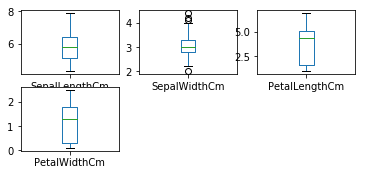

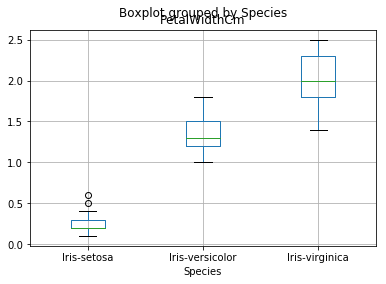

In [10]:
# practise with plot in python 
from matplotlib import pyplot  as plt
df.plot(kind = 'box', subplots = True, layout = (3, 3), sharex = False, sharey = False)

df.boxplot(column=['PetalWidthCm'],by='Species')
plt.show()

 

In [63]:

features = list(df.columns[:4])
df.head()
X=df[features]
y=df['Species']


In [64]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [76]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=10,scoring='f1_macro')
#cross_val_score(clf, X, y, cv=10)

array([ 1.        ,  0.93265993,  1.        ,  0.93265993,  0.93265993,
        0.86666667,  0.93265993,  0.93265993,  1.        ,  1.        ])

In [72]:
cross_val_score(clf, X, y, cv=10,scoring='accuracy')

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  1.        ,  1.        ,  1.        ])

In [78]:
cross_val_score(clf, X, y, cv=10,scoring='recall_macro')

array([ 1.        ,  0.93333333,  1.        ,  0.93333333,  0.93333333,
        0.86666667,  0.93333333,  0.93333333,  1.        ,  1.        ])

In [79]:
cross_val_score(clf, X, y, cv=10,scoring='precision_macro')

array([ 1.        ,  0.94444444,  1.        ,  0.94444444,  0.94444444,
        0.86666667,  0.94444444,  0.94444444,  1.        ,  1.        ])

In [66]:
tree.export_graphviz(clf,out_file='tree.dot') 

In [67]:
from sklearn.externals.six import StringIO  
import pydot 
from IPython.display import Image  
from sklearn.tree import export_graphviz
 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
 
#type(graph)
graph[0].write_pdf("iris.pdf") 

 

True

In [68]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=10)
clf2 = clf2.fit(X, y)
estimator = clf2.estimators_[5]


In [69]:
dot_data2 = StringIO() 
tree.export_graphviz(estimator, out_file=dot_data2,
                    feature_names = features,
                    class_names = y.unique(),
                    rounded = True, proportion = False, 
                    precision = 2, filled = True) 
graph2 = pydot.graph_from_dot_data(dot_data2.getvalue()) 
 
graph2[0].write_pdf("iris_rf.pdf") 

 

True